In [1]:
#importing the modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#reading the csv file
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [15]:
#checking how many null value is their
null_values=df.isnull().sum()
#print(null_values)
print(null_values[null_values>0])

Series([], dtype: int64)


In [17]:
#Exploring the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


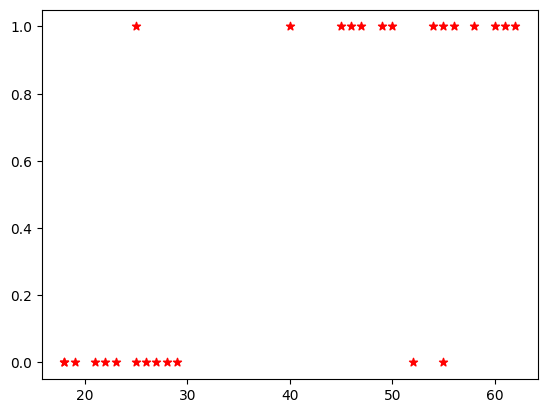

In [20]:
plt.scatter(df.age,df.bought_insurance,marker='*', color='red')

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)
print(X_test)

   age
3   52
2   47
9   61


In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(y_predicted)

[1 1 1]


In [35]:
model.predict_proba(X_test)

array([[0.08805985, 0.91194015],
       [0.17518379, 0.82481621],
       [0.02283465, 0.97716535]])

In [37]:
print(model.coef_,model.intercept_)

[[0.15764655]] [-5.86006296]


In [40]:
#Defining Sigmoid function
import math
def sigmoid(z):
    return 1/(1+math.exp(-z))

def prediction(x):
    z=0.15764655*x+(-5.86006296)
    value=sigmoid(z)
    return value

In [42]:
print(prediction(60))

0.9733701079006959


In [43]:
#Let's check the model accuracy
model.score(X_test,y_test)

0.6666666666666666